In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## S1 - Read Data
- train
- test
- oil
- stores
- holidays

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store-sales-time-series-forecasting/train.csv',parse_dates =["date"])
data = train_data
train_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [4]:
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store-sales-time-series-forecasting/test.csv')
test_data

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [5]:
oil = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store-sales-time-series-forecasting/oil.csv')
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [6]:
stores = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store-sales-time-series-forecasting/stores.csv')
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [7]:
holidays = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store-sales-time-series-forecasting/holidays_events.csv')
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


## Create Model Input

In [9]:
def generateInput(X_ori):
    
    #X_ori = X_ori[X_ori["date"].isin(pd.date_range('2015-01-01', '2017-08-15'))].reset_index(drop=True)
    X_ori = X_ori.merge(stores[['store_nbr','cluster']], on = ['store_nbr'], how = 'left')
    
    #X_ori = X_ori[X_ori.cluster != 16].reset_index(drop=True)
    
    X_ori.drop(['id','cluster'], axis=1, inplace=True)
    
    X_ori = X_ori.set_index(['date','store_nbr','family'])

    set_family = list(set(X_ori.reset_index()['family']))
    set_store = list(set(X_ori.reset_index()['store_nbr']))
    print(len(set_family))
    print(len(set_store))

    df_X = pd.DataFrame(columns = ['sales','onpromotion'], index = list(set(X_ori.reset_index()['date'])))
    X_ori = X_ori.reset_index().set_index('date')
    for s in set_store:
        print(s)
        for f in set_family:
            m = X_ori[X_ori.store_nbr==s]
            m = m[m.family==f].drop(['store_nbr','family'], axis=1)
            
            df_X = df_X.join(m, how = 'outer',rsuffix = "_"+str(s)+"_"+f)
            
    df_X = df_X.drop(['sales','onpromotion'],axis =1)



    return df_X

df_X = generateInput(train_data)
df_X

33
54
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54


,sales_1_BEAUTY,onpromotion_1_BEAUTY,sales_1_BABY CARE,onpromotion_1_BABY CARE,sales_1_LADIESWEAR,onpromotion_1_LADIESWEAR,sales_1_BEVERAGES,onpromotion_1_BEVERAGES,sales_1_DELI,onpromotion_1_DELI,sales_1_HOME APPLIANCES,onpromotion_1_HOME APPLIANCES,sales_1_PERSONAL CARE,onpromotion_1_PERSONAL CARE,sales_1_CELEBRATION,onpromotion_1_CELEBRATION,sales_1_DAIRY,onpromotion_1_DAIRY,"sales_1_LIQUOR,WINE,BEER","onpromotion_1_LIQUOR,WINE,BEER",sales_1_PET SUPPLIES,onpromotion_1_PET SUPPLIES,sales_1_LINGERIE,onpromotion_1_LINGERIE,sales_1_PREPARED FOODS,onpromotion_1_PREPARED FOODS,sales_1_BREAD/BAKERY,onpromotion_1_BREAD/BAKERY,sales_1_PRODUCE,onpromotion_1_PRODUCE,sales_1_AUTOMOTIVE,onpromotion_1_AUTOMOTIVE,sales_1_HARDWARE,onpromotion_1_HARDWARE,sales_1_BOOKS,onpromotion_1_BOOKS,sales_1_GROCERY I,onpromotion_1_GROCERY I,sales_1_LAWN AND GARDEN,onpromotion_1_LAWN AND GARDEN,...,sales_54_BREAD/BAKERY,onpromotion_54_BREAD/BAKERY,sales_54_PRODUCE,onpromotion_54_PRODUCE,sales_54_AUTOMOTIVE,onpromotion_54_AUTOMOTIVE,sales_54_HARDWARE,onpromotion_54_HARDWARE,sales_54_BOOKS,onpromotion_54_BOOKS,sales_54_GROCERY I,onpromotion_54_GROCERY I,sales_54_LAWN AND GARDEN,onpromotion_54_LAWN AND GARDEN,sales_54_HOME AND KITCHEN I,onpromotion_54_HOME AND KITCHEN I,sales_54_PLAYERS AND ELECTRONICS,onpromotion_54_PLAYERS AND ELECTRONICS,sales_54_HOME CARE,onpromotion_54_HOME CARE,sales_54_GROCERY II,onpromotion_54_GROCERY II,sales_54_HOME AND KITCHEN II,onpromotion_54_HOME AND KITCHEN II,sales_54_CLEANING,onpromotion_54_CLEANING,sales_54_FROZEN FOODS,onpromotion_54_FROZEN FOODS,sales_54_MEATS,onpromotion_54_MEATS,sales_54_SCHOOL AND OFFICE SUPPLIES,onpromotion_54_SCHOOL AND OFFICE SUPPLIES,sales_54_EGGS,onpromotion_54_EGGS,sales_54_MAGAZINES,onpromotion_54_MAGAZINES,sales_54_POULTRY,onpromotion_54_POULTRY,sales_54_SEAFOOD,onpromotion_54_SEAFOOD
2013-01-01,0.0,0,0.0,0,0.0,0,0.0,0,0.000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.00000,0,0.000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0
2013-01-02,2.0,0,0.0,0,0.0,0,1091.0,0,164.069,0,0.0,0,194.0,0,0.0,0,579.0,0,67.0,0,0.0,0,13.0,0,47.000000,0,470.65200,0,0.000,0,2.0,0,3.0,0,0.0,0,2652.0,0,10.0,0,...,257.0,0,0.000,0,5.0,0,0.0,0,0.0,0,2348.0,0,0.0,0,0.0,0,0.0,0,0.0,0,17.0,0,0.0,0,1090.0,0,10.0,0,73.771000,0,0.0,0,49.0,0,0.0,0,15.514000,0,3.0,0
2013-01-03,0.0,0,0.0,0,0.0,0,919.0,0,151.582,0,2.0,0,153.0,0,0.0,0,453.0,0,66.0,0,0.0,0,15.0,0,63.000000,0,310.65500,0,0.000,0,3.0,0,1.0,0,0.0,0,2121.0,0,0.0,0,...,171.0,0,0.000,0,3.0,0,2.0,0,0.0,0,1949.0,0,0.0,0,0.0,0,0.0,0,0.0,0,6.0,0,0.0,0,868.0,0,3.0,0,50.257000,0,0.0,0,45.0,0,0.0,0,4.313000,0,2.0,0
2013-01-04,3.0,0,0.0,0,0.0,0,953.0,0,131.411,0,0.0,0,88.0,0,0.0,0,460.0,0,102.0,0,0.0,0,24.0,0,67.000000,0,198.36600,0,0.000,0,3.0,0,7.0,0,0.0,0,2056.0,0,7.0,0,...,165.0,0,0.000,0,2.0,0,1.0,0,0.0,0,1641.0,0,0.0,0,0.0,0,0.0,0,0.0,0,2.0,0,0.0,0,678.0,0,4.0,0,40.223000,0,0.0,0,33.0,0,0.0,0,26.743000,0,2.0,0
2013-01-05,3.0,0,0.0,0,0.0,0,1160.0,0,118.613,0,0.0,0,141.0,0,0.0,0,464.0,0,159.0,0,0.0,0,20.0,0,66.000000,0,301.05700,0,0.000,0,5.0,0,1.0,0,0.0,0,2216.0,0,10.0,0,...,169.0,0,0.000,0,10.0,0,1.0,0,0.0,0,2161.0,0,0.0,0,0.0,0,0.0,0,0.0,0,4.0,0,0.0,0,1090.0,0,7.0,0,43.431000,0,0.0,0,30.0,0,0.0,0,31.118000,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,1.0,1,0.0,0,3.0,0,1006.0,3,64.302,35,0.0,0,53.0,5,4.0,0,343.0,14,67.0,2,5.0,0,1.0,0,24.963001,0,145.60700,8,1115.334,7,1.0,0,1.0,0,0.0,0,1270.0,24,15.0,0,...,137.0,5,546.250,3,11.0,0,1.0,0,0.0,0,2823.0,45,0.0,0,10.0,1,0.0,0,163.0,6,2.0,0,6.0,0,644.0,18,27.0,1,50.756000,0,0.0,0,80.0,1,0.0,0,80.759

In [10]:
# set_family = list(set(X.reset_index()['family']))
# set_store = list(set(X.reset_index()['store_nbr']))
# print(len(set_family))
# print(len(set_store))

In [11]:
# df_X = pd.DataFrame(columns = ['sales','onpromotion'], index = list(set(X.reset_index()['date'])))
# X = X.reset_index().set_index('date')
# for s in set_store:
#     print(s)
#     for f in set_family:
#         m = X[X.store_nbr==s]
#         m = m[m.family==f].drop(['store_nbr','family'], axis=1)
        
#         df_X = df_X.join(m, how = 'outer',rsuffix = "_"+str(s)+"_"+f)
        
# df_X = df_X.drop(['sales','onpromotion'],axis =1)

In [12]:
# df_X

In [17]:
seriesLength = 60
predDays = 16

In [13]:
def generater(df_X):
    train_y_col = []
    df_X_col = df_X.columns
    for c in df_X_col:
        if c.split("_")[0] == "sales":
            train_y_col.append(c)

    train_X = df_X
    train_y = df_X[train_y_col]

    train_X = train_X.reset_index(drop=True)
    train_y = train_y.reset_index(drop=True)

    trainX = []
    trainY = []

    for i in range(len(train_X)):
        start = i
        end = i + seriesLength
        # print(start,end)
        appX = np.array(train_X.iloc[start: end,:])
        appY = np.array(train_y.iloc[end:end + predDays, :])
        if appX.shape[0] < seriesLength or appY.shape[0] < predDays:
            break
        trainX.append(appX)
        trainY.append(appY)

    trainX = np.array(trainX)
    trainY = np.array(trainY)
    print("trainX shape:",trainX.shape)
    print("trainY shape:",trainY.shape)

    return trainX, trainY

In [14]:
def generater_noY(df_X):
    df_X_col = df_X.columns

    train_X = df_X

    train_X = train_X.reset_index(drop=True)

    trainX = []

    seriesLength = 60
    #seriesMoveLength = 1
    predDays = 16

    for i in range(len(train_X)):
        start = i
        end = i + seriesLength
        # print(start,end)
        appX = np.array(train_X.iloc[start: end,:])
        if appX.shape[0] < seriesLength:
            break
        trainX.append(appX)

    trainX = np.array(trainX)
    print("trainX shape:",trainX.shape)
    return trainX

In [15]:
trainX, trainY = generater(df_X)

trainX shape: (1609, 60, 3564)
trainY shape: (1609, 16, 1782)


## S4 - Bulid RNN Model

In [18]:
print(seriesLength, trainX.shape[2])

model_baseline = keras.models.Sequential([
    keras.layers.Conv1D(filters=100, kernel_size=5, strides=3, padding="valid",input_shape = (seriesLength, trainX.shape[2])), 
    keras.layers.Conv1D(filters=100, kernel_size=3, strides=1, padding="valid"), 
    keras.layers.Conv1D(filters=100, kernel_size=2, strides=1, padding="valid"), 
    keras.layers.LSTM(100, activation='relu', return_sequences=True), 
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(100, activation='relu', return_sequences=True), 
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(100, activation='relu', return_sequences=True), 
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(100, activation='relu', return_sequences=True), 
    keras.layers.Dropout(0.2),
    keras.layers.TimeDistributed(keras.layers.Dense(trainY.shape[2]))
]) 

model_baseline.compile(loss="mse", optimizer="adam")

model_baseline.summary()

60 3564
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 100)           1782100   
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 100)           30100     
                                                                 
 conv1d_2 (Conv1D)           (None, 16, 100)           20100     
                                                                 
 lstm (LSTM)                 (None, 16, 100)           80400     
                                                                 
 dropout (Dropout)           (None, 16, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 16, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 16, 100)    

In [19]:
history = model_baseline.fit(x=trainX, y=trainY, epochs=100)

Epoch 1/100
51/51 [==============================] - 17s 226ms/step - loss: 5341689.5000
Epoch 2/100
51/51 [==============================] - 11s 224ms/step - loss: 2369390.0000
Epoch 3/100
51/51 [==============================] - 11s 224ms/step - loss: 991414.0000
Epoch 4/100
51/51 [==============================] - 12s 228ms/step - loss: 812794.8125
Epoch 5/100
51/51 [==============================] - 11s 222ms/step - loss: 753238.6250
Epoch 6/100
51/51 [==============================] - 12s 228ms/step - loss: 678679.6875
Epoch 7/100
51/51 [==============================] - 11s 221ms/step - loss: 622513.6250
Epoch 8/100
51/51 [==============================] - 11s 223ms/step - loss: 597892.2500
Epoch 9/100
51/51 [==============================] - 11s 222ms/step - loss: 540091.8750
Epoch 10/100
51/51 [==============================] - 11s 222ms/step - loss: 520482.8438
Epoch 11/100
51/51 [==============================] - 11s 223ms/step - loss: 670020.8750
Epoch 12/100
51/51 [========

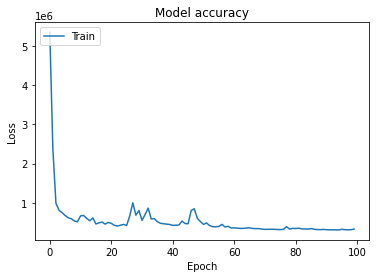

In [20]:
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [21]:
pred_dfX = df_X.reset_index().iloc[0-seriesLength:,:]
pred_dfX = pred_dfX.set_index('index')
pred_dfX

,sales_1_BEAUTY,onpromotion_1_BEAUTY,sales_1_BABY CARE,onpromotion_1_BABY CARE,sales_1_LADIESWEAR,onpromotion_1_LADIESWEAR,sales_1_BEVERAGES,onpromotion_1_BEVERAGES,sales_1_DELI,onpromotion_1_DELI,sales_1_HOME APPLIANCES,onpromotion_1_HOME APPLIANCES,sales_1_PERSONAL CARE,onpromotion_1_PERSONAL CARE,sales_1_CELEBRATION,onpromotion_1_CELEBRATION,sales_1_DAIRY,onpromotion_1_DAIRY,"sales_1_LIQUOR,WINE,BEER","onpromotion_1_LIQUOR,WINE,BEER",sales_1_PET SUPPLIES,onpromotion_1_PET SUPPLIES,sales_1_LINGERIE,onpromotion_1_LINGERIE,sales_1_PREPARED FOODS,onpromotion_1_PREPARED FOODS,sales_1_BREAD/BAKERY,onpromotion_1_BREAD/BAKERY,sales_1_PRODUCE,onpromotion_1_PRODUCE,sales_1_AUTOMOTIVE,onpromotion_1_AUTOMOTIVE,sales_1_HARDWARE,onpromotion_1_HARDWARE,sales_1_BOOKS,onpromotion_1_BOOKS,sales_1_GROCERY I,onpromotion_1_GROCERY I,sales_1_LAWN AND GARDEN,onpromotion_1_LAWN AND GARDEN,...,sales_54_BREAD/BAKERY,onpromotion_54_BREAD/BAKERY,sales_54_PRODUCE,onpromotion_54_PRODUCE,sales_54_AUTOMOTIVE,onpromotion_54_AUTOMOTIVE,sales_54_HARDWARE,onpromotion_54_HARDWARE,sales_54_BOOKS,onpromotion_54_BOOKS,sales_54_GROCERY I,onpromotion_54_GROCERY I,sales_54_LAWN AND GARDEN,onpromotion_54_LAWN AND GARDEN,sales_54_HOME AND KITCHEN I,onpromotion_54_HOME AND KITCHEN I,sales_54_PLAYERS AND ELECTRONICS,onpromotion_54_PLAYERS AND ELECTRONICS,sales_54_HOME CARE,onpromotion_54_HOME CARE,sales_54_GROCERY II,onpromotion_54_GROCERY II,sales_54_HOME AND KITCHEN II,onpromotion_54_HOME AND KITCHEN II,sales_54_CLEANING,onpromotion_54_CLEANING,sales_54_FROZEN FOODS,onpromotion_54_FROZEN FOODS,sales_54_MEATS,onpromotion_54_MEATS,sales_54_SCHOOL AND OFFICE SUPPLIES,onpromotion_54_SCHOOL AND OFFICE SUPPLIES,sales_54_EGGS,onpromotion_54_EGGS,sales_54_MAGAZINES,onpromotion_54_MAGAZINES,sales_54_POULTRY,onpromotion_54_POULTRY,sales_54_SEAFOOD,onpromotion_54_SEAFOOD
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-06-17,1.0,1,0.0,0,20.0,0,2738.0,19,166.304000,2,1.0,0,163.0,8,17.0,0,865.0,18,188.0,5,10.0,0,6.0,0,71.177000,0,387.04000,0,2845.0310,3,3.0,0,4.0,0,0.0,0,3016.0,49,11.0,0,...,231.0,2,877.422,2,11.0,0,0.0,0,0.0,0,3839.0,61,0.0,0,36.0,3,3.0,0,311.0,15,10.0,0,15.0,0,1262.0,21,99.519,13,58.841000,0,0.0,0,97.0,1,4.0,0,91.482000,0,3.0,2
2017-06-18,2.0,1,0.0,0,4.0,0,1005.0,10,62.162000,0,1.0,0,90.0,7,7.0,0,347.0,12,67.0,3,4.0,0,2.0,0,35.853000,0,160.19200,0,1270.6130,3,2.0,0,0.0,0,0.0,0,1223.0,40,8.0,0,...,352.0,41,938.642,1,5.0,0,2.0,0,0.0,0,3718.0,57,0.0,0,52.0,4,1.0,0,349.0,16,9.0,2,17.0,0,1526.0,20,73.252,0,60.603000,0,0.0,0,99.0,1,1.0,0,112.353004,0,3.0,0
2017-06-19,3.0,0,0.0,0,11.0,0,2493.0,16,140.827000,2,0.0,0,186.0,8,15.0,0,665.0,21,50.0,2,9.0,0,15.0,0,77.513000,0,402.69400,0,2646.5230,3,3.0,0,2.0,0,0.0,0,3373.0,47,8.0,0,...,235.0,2,529.723,1,8.0,0,1.0,0,0.0,0,2897.0,53,0.0,0,23.0,1,0.0,0,279.0,15,0.0,0,15.0,0,1154.0,23,12.000,0,62.902000,0,0.0,0,66.0,10,1.0,0,46.213000,0,4.0,0
2017-06-20,6.0,1,0.0,0,14.0,0,2977.0,17,127.118000,3,1.0,0,179.0,6,13.0,0,707.0,24,89.0,5,6.0,0,12.0,0,76.582000,0,414.98000,0,2414.1620,3,3.0,0,7.0,0,0.0,0,4575.0,48,25.0,0,...,244.0,2,860.505,73,5.0,0,0.0,0,0.0,0,2810.0,67,0.0,0,8.0,1,2.0,0,366.0,15,4.0,0,13.0,1,1006.0,19,40.000,1,63.218998,0,0.0,0,70.0,1,1.0,0,54.726000,0,4.0,0
2017-06-21,5.0,1,0.0,0,10.0,0,2583.0,34,151.728000,3,0.0,0,175.0,8,10.0,0,810.0,26,106.0,4,6.0,1,15.0,0,63.836998,0,388.40300,6,4339.4850,213,1.0,0,5.0,0,0.0,0,2898.0,80,21.0,5,...,254.0,4,542.977,1,6.0,0,0.0,0,0.0,0,2120.0,57,0.0,0,27.0,2,2.0,0,169.0,13,1.0,0,12.0,0,744.0,35,25.000,0,36.070000,0,0.0,0,105.0,1,2.0,0,56.029000,0,9.0,0
2017-06-22,5.0,1,0.0,0,18.0,0,1824.0,21,130.453000,1,0.0,0,111.0,6,18.0,0,713.0,31,93.0,2,7.0,0,5.0,0,65.750000,0,361.81300,5,2298.4420,3,1.0,0,2.0,0,0.0,0,2499.0,56,10.0,0,...,163.0,6,499.044,0,1.0,0,1.0,0,0.0,0,2093.0,62,0.0,0,34.0,5,1.0,0,146.0,16,5.0,0,9.0,0,613.0,42,20.000,0,47.017000,7,0.0,0,119.0,1,0.0,0,55.425000,0,0.0,0
2017-06-23,3.0,1,0.0,0,8.0,0,2394.0,24,159.980000,52,1.0,0,117.

In [22]:
pred_trainX = generater_noY(pred_dfX)

trainX shape: (1, 60, 3564)


In [23]:
test_pred = model_baseline.predict(pred_trainX)
test_pred.shape

(1, 16, 1782)

In [24]:
y_col = []
df_X_col = df_X.columns
for c in df_X_col:
    if c.split("_")[0] == "sales":
        y_col.append(c)

In [25]:
test_pred = test_pred[0]
test_pred = pd.DataFrame(test_pred, columns = y_col, index = list(set(test_data['date'])))
test_pred

,sales_1_BEAUTY,sales_1_BABY CARE,sales_1_LADIESWEAR,sales_1_BEVERAGES,sales_1_DELI,sales_1_HOME APPLIANCES,sales_1_PERSONAL CARE,sales_1_CELEBRATION,sales_1_DAIRY,"sales_1_LIQUOR,WINE,BEER",sales_1_PET SUPPLIES,sales_1_LINGERIE,sales_1_PREPARED FOODS,sales_1_BREAD/BAKERY,sales_1_PRODUCE,sales_1_AUTOMOTIVE,sales_1_HARDWARE,sales_1_BOOKS,sales_1_GROCERY I,sales_1_LAWN AND GARDEN,sales_1_HOME AND KITCHEN I,sales_1_PLAYERS AND ELECTRONICS,sales_1_HOME CARE,sales_1_GROCERY II,sales_1_HOME AND KITCHEN II,sales_1_CLEANING,sales_1_FROZEN FOODS,sales_1_MEATS,sales_1_SCHOOL AND OFFICE SUPPLIES,sales_1_EGGS,sales_1_MAGAZINES,sales_1_POULTRY,sales_1_SEAFOOD,sales_2_BEAUTY,sales_2_BABY CARE,sales_2_LADIESWEAR,sales_2_BEVERAGES,sales_2_DELI,sales_2_HOME APPLIANCES,sales_2_PERSONAL CARE,...,sales_53_FROZEN FOODS,sales_53_MEATS,sales_53_SCHOOL AND OFFICE SUPPLIES,sales_53_EGGS,sales_53_MAGAZINES,sales_53_POULTRY,sales_53_SEAFOOD,sales_54_BEAUTY,sales_54_BABY CARE,sales_54_LADIESWEAR,sales_54_BEVERAGES,sales_54_DELI,sales_54_HOME APPLIANCES,sales_54_PERSONAL CARE,sales_54_CELEBRATION,sales_54_DAIRY,"sales_54_LIQUOR,WINE,BEER",sales_54_PET SUPPLIES,sales_54_LINGERIE,sales_54_PREPARED FOODS,sales_54_BREAD/BAKERY,sales_54_PRODUCE,sales_54_AUTOMOTIVE,sales_54_HARDWARE,sales_54_BOOKS,sales_54_GROCERY I,sales_54_LAWN AND GARDEN,sales_54_HOME AND KITCHEN I,sales_54_PLAYERS AND ELECTRONICS,sales_54_HOME CARE,sales_54_GROCERY II,sales_54_HOME AND KITCHEN II,sales_54_CLEANING,sales_54_FROZEN FOODS,sales_54_MEATS,sales_54_SCHOOL AND OFFICE SUPPLIES,sales_54_EGGS,sales_54_MAGAZINES,sales_54_POULTRY,sales_54_SEAFOOD
2017-08-29,2.831151,-0.827173,8.644018,1248.326660,95.700958,0.711182,111.794273,7.282835,435.533356,84.029213,2.166580,5.143292,73.109200,296.352448,1258.487305,2.848195,4.260677,-1.263520,1559.233521,6.295552,9.762949,7.553957,106.177361,15.146482,5.754554,433.879059,73.067284,260.460510,-1.142505,112.093674,3.300218,251.875244,19.193436,1.683882,-0.451115,16.082380,1996.694824,225.297958,-0.484488,263.759094,...,112.121902,107.493065,2.839515,46.522522,4.461319,94.429031,1.226023,0.911421,1.665865,-0.259524,982.681763,137.131577,-3.594852,153.957336,2.647441,132.120514,26.608223,-0.845714,5.860319,28.248371,171.024658,393.319916,9.188522,1.335567,2.590212,2002.942871,1.175574,13.019608,1.801777,138.459503,-2.966827,1.601783,837.192444,23.054831,39.982830,2.883308,44.935390,0.546595,43.172195,-0.256636
2017-08-30,2.947393,-1.101641,6.987540,1307.394287,100.071983,1.615353,119.112503,7.834468,455.344910,86.335678,2.069046,4.356998,73.260513,307.588684,1142.862549,2.927115,3.228197,-2.271382,1595.777222,6.494592,10.180794,6.997663,113.112762,16.456928,7.057725,478.169281,81.199249,281.884033,-1.580204,115.595833,2.457142,269.518982,18.491079,3.598533,-0.599040,12.867980,2026.773926,227.646820,1.000547,287.863525,...,111.327484,102.411301,2.873271,50.860374,4.537104,89.586731,2.980817,1.495240,1.352832,-0.080151,1031.396729,137.515320,-1.927648,156.897110,2.199498,135.579987,23.858393,-2.357710,5.869291,31.808094,177.253952,420.271149,9.809462,1.909758,2.986595,2093.777832,2.259116,10.332941,1.912664,150.495941,-2.341548,3.792346,933.918518,19.608295,43.809776,4.288010,43.704594,1.022742,45.553368,0.070463
2017-08-25,3.948609,-0.778811,8.461786,1257.698608,98.490395,1.250133,118.317902,6.224938,434.923798,90.340805,1.562653,7.166420,74.264664,303.175507,1028.979248,3.984613,3.461601,-0.541374,1509.086304,5.664758,9.298753,8.757329,111.717064,17.700977,6.416633,467.394409,84.771835,283.436859,-1.203802,115.717682,3.806630,272.582733,19.281631,2.583789,0.535089,11.925153,1950.692505,224.475754,-0.967113,284.821747,...,105.512848,90.484459,1.124638,50.309376,4.846972,75.702179,2.901796,1.823247,2.085189,-0.966809,991.801880,138.132446,-2.547343,159.639923,2.626966,133.890671,23.665291,-3.267846,3.410336,34.833305,179.966446,425.460968,9.412667,1.109652,2.573501,2064.041260,0.043665,11.459236,0.289411,148.539200,-2.261829,2.788652,964.217407,17.463

In [26]:
test_pred.to_excel("test_pred4.xlsx")